<a href="https://colab.research.google.com/github/joel2982/FraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/AccredianAssignment/Fraud.csv")

## Exploratory Data Analysis

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


import numpy as np
from google.colab import autoviz
df_4873931122042503645 = autoviz.get_registered_df('df_4873931122042503645')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4873931122042503645, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4067928246582409271 = autoviz.get_registered_df('df_4067928246582409271')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4067928246582409271, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5366307000627570739 = autoviz.get_registered_df('df_5366307000627570739')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5366307000627570739, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2595148815259708169 = autoviz.get_registered_df('df_2595148815259708169')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2595148815259708169, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7667407503721231965 = autoviz.get_registered_df('df_7667407503721231965')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7667407503721231965, *['step'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8888397001652956079 = autoviz.get_registered_df('df_8888397001652956079')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8888397001652956079, *['amount'], **{})
chart

import numpy as np
from google.colab import autoviz
df_897389499407902797 = autoviz.get_registered_df('df_897389499407902797')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_897389499407902797, *['oldbalanceOrg'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5303822754407428085 = autoviz.get_registered_df('df_5303822754407428085')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5303822754407428085, *['newbalanceOrig'], **{})
chart

import numpy as np
from google.colab import autoviz
df_468659873200426312 = autoviz.get_registered_df('df_468659873200426312')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_468659873200426312, *['type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4305142431256543525 = autoviz.get_registered_df('df_4305142431256543525')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4305142431256543525, *[[['step', 'amount'], ['amount', 'oldbalanceOrg'], ['oldbalanceOrg', 'newbalanceOrig'], ['newbalanceOrig', 'oldbalanceDest']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3966919681767019236 = autoviz.get_registered_df('df_3966919681767019236')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3966919681767019236, *['step', 'type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_6835653696525445785 = autoviz.get_registered_df('df_6835653696525445785')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6835653696525445785, *['amount', 'type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_2588363546577425435 = autoviz.get_registered_df('df_2588363546577425435')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2588363546577425435, *['oldbalanceOrg', 'type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_5265150676271327105 = autoviz.get_registered_df('df_5265150676271327105')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5265150676271327105, *['newbalanceOrig', 'type'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_2494551180358711864 = autoviz.get_registered_df('df_2494551180358711864')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2494551180358711864, *['step', 'amount', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6694116099543794854 = autoviz.get_registered_df('df_6694116099543794854')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6694116099543794854, *['step', 'oldbalanceOrg', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8809864355268776813 = autoviz.get_registered_df('df_8809864355268776813')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8809864355268776813, *['step', 'newbalanceOrig', 'type'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1594455543588656517 = autoviz.get_registered_df('df_1594455543588656517')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1594455543588656517, *['step', 'oldbalanceDest', 'type'], **{})
chart

In [ ]:
# checking for NULL values in the dataframe
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No NULL values in the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking the dataset indepth.

In [ ]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


More than 1/4 of all the balance attributes are zeroes but the amount transferred is shown.

In [ ]:
# checking for no. of balance values which are zero
print((df["oldbalanceOrg"]==0).sum())
print((df["newbalanceOrig"]==0).sum())
print((df["oldbalanceDest"]==0).sum())
print((df["newbalanceDest"]==0).sum())
print((df["amount"]>200000).sum())
print((df["isFlaggedFraud"]==1).sum())

2102449
3609566
2704388
2439433
1673570
16


In [ ]:
# cases with all transaction values equal to zero.
df[np.logical_and(np.logical_and(df["amount"]==0,df["newbalanceDest"]==0),df["oldbalanceOrg"]==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.0,0.0,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.0,0.0,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.0,0.0,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.0,0.0,1,0
6281485,646,CASH_OUT,0.0,C1997645312,0.0,0.0,C601248796,0.0,0.0,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.0,0.0,1,0


We can see that cases with all the transaction values equal to zeroes are categorized as fraud

In [ ]:
df[df["amount"]==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


All the cases with amount equal to zero are categorized as Fraud.

In [ ]:
df[np.logical_and(np.logical_and(np.logical_and(df["amount"]==0,df["newbalanceDest"]==0),df["oldbalanceOrg"]==0),df["isFraud"]==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


No cases with all values equal to zero.

In [ ]:
df[np.logical_and(df["newbalanceDest"]!=0,df["oldbalanceOrg"]==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0
83,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0
84,1,TRANSFER,379856.23,C1449772539,0.0,0.0,C1590550415,900180.00,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356000,709,CASH_OUT,104570.26,C606038734,0.0,0.0,C258512603,2890040.30,2994610.55,0,0
6356051,709,CASH_OUT,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0


There are a lot of cases with the Original Bank having no balance but the transfer is still talking place and it is not categorized as Fraud.

In [ ]:
Fraud = {}
for i in df.index:
 if df["isFraud"][i] == 1:
   key = df["nameOrig"][i]
   Fraud[key] = Fraud[key] + 1 if key in Fraud else 1

In [ ]:
all(x==1 for x in Fraud.values())

True

Fraud is not repeated using the same customerID

In [ ]:
# adding amount transferred and amount added columns to check if amount column is constant all throughout
df["amt_transferred"] = (df["oldbalanceOrg"]-df["newbalanceOrig"]).round(2)
df["amt_added"] = (df["oldbalanceDest"]-df["newbalanceDest"]).round(2)

In [ ]:
sum = 0
sumDest = 0
for i in df.index:
 if df["amt_transferred"][i] != df["amount"][i]:
   sum = sum + 1
 if df["amt_added"][i] != df["amount"][i]:
   sumDest = sumDest + 1
print(sum)
print(sumDest)

5125552
5587425


This is because the amount is stored in local currency and the Bank Balance in a different currency in many cases.

At the end "amt_transferred" will also help in building model as the currency is constant.

In [ ]:
df[df["amt_transferred"]==df["amt_added"]]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amt_transferred,amt_added
29,1,PAYMENT,9920.52,C764826684,0.00,0.00,M1940055334,0.00,0.00,0,0,0.0,0.0
30,1,PAYMENT,3448.92,C2103763750,0.00,0.00,M335107734,0.00,0.00,0,0,0.0,0.0
31,1,PAYMENT,4206.84,C215078753,0.00,0.00,M1757317128,0.00,0.00,0,0,0.0,0.0
32,1,PAYMENT,5885.56,C840514538,0.00,0.00,M1804441305,0.00,0.00,0,0,0.0,0.0
33,1,PAYMENT,5307.88,C1768242710,0.00,0.00,M1971783162,0.00,0.00,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362461,730,CASH_OUT,0.00,C729003789,0.00,0.00,C1388096959,1008609.53,1008609.53,1,0,0.0,0.0
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1,0.0,0.0
6362463,730,CASH_OUT,0.00,C2088151490,0.00,0.00,C1156763710,0.00,0.00,1,0,0.0,0.0
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1,0.0,0.0


In all these cases one of the 2 banks will have no balance.

In [ ]:
# percentage of fraudulent payments
print("Percentage of Fraudulent Payments:",len(df[df["isFraud"]==1])/len(df)*100)
print("Percentage of Non-Fraudulent Payments:",len(df[df["isFraud"]==0])/len(df)*100)

Percentage of Fraudulent Payments: 0.12908204481801522
Percentage of Non-Fraudulent Payments: 99.87091795518198


Highly unbalanced Dataset.

## Data Preprocessing

In [ ]:
# checking how many attributes are dtype: object
obj = df.select_dtypes(include = "object").columns
print (obj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#creating new DataFrame for Label Encoding
new_df = df.copy()

for i in obj:
    new_df[i] = le.fit_transform(new_df[i].astype(str))

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             int64  
 2   amount           float64
 3   nameOrig         int64  
 4   oldbalanceOrg    float64
 5   newbalanceOrig   float64
 6   nameDest         int64  
 7   oldbalanceDest   float64
 8   newbalanceDest   float64
 9   isFraud          int64  
 10  isFlaggedFraud   int64  
 11  amt_transferred  float64
 12  amt_added        float64
dtypes: float64(7), int64(6)
memory usage: 631.1 MB


We have encoded the columns with object datatype to check for multi-colinearlity

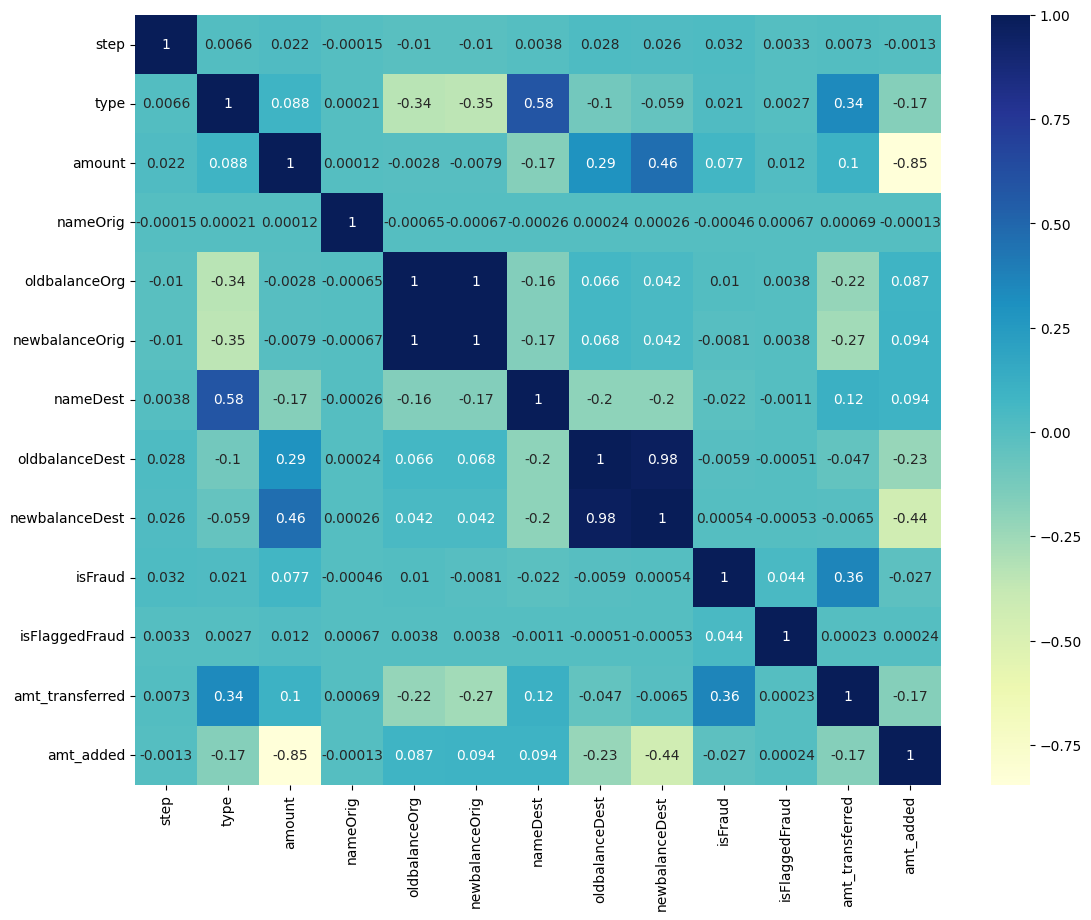

In [ ]:
# checking the correlation between the columns
plt.figure(figsize=(13,10))
sns.heatmap(new_df.corr(), cmap="YlGnBu",annot=True)
plt.show()

All the variables indicating balances have a very high colinearity. Also as amt_transferred is deduced from the balances and is colinear with isFraud. It will be helpful in model building.

In [ ]:
# dropping columns with very high colinearity
new_df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis="columns",inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             int64  
 2   amount           float64
 3   nameOrig         int64  
 4   nameDest         int64  
 5   isFraud          int64  
 6   isFlaggedFraud   int64  
 7   amt_transferred  float64
 8   amt_added        float64
dtypes: float64(3), int64(6)
memory usage: 436.9 MB


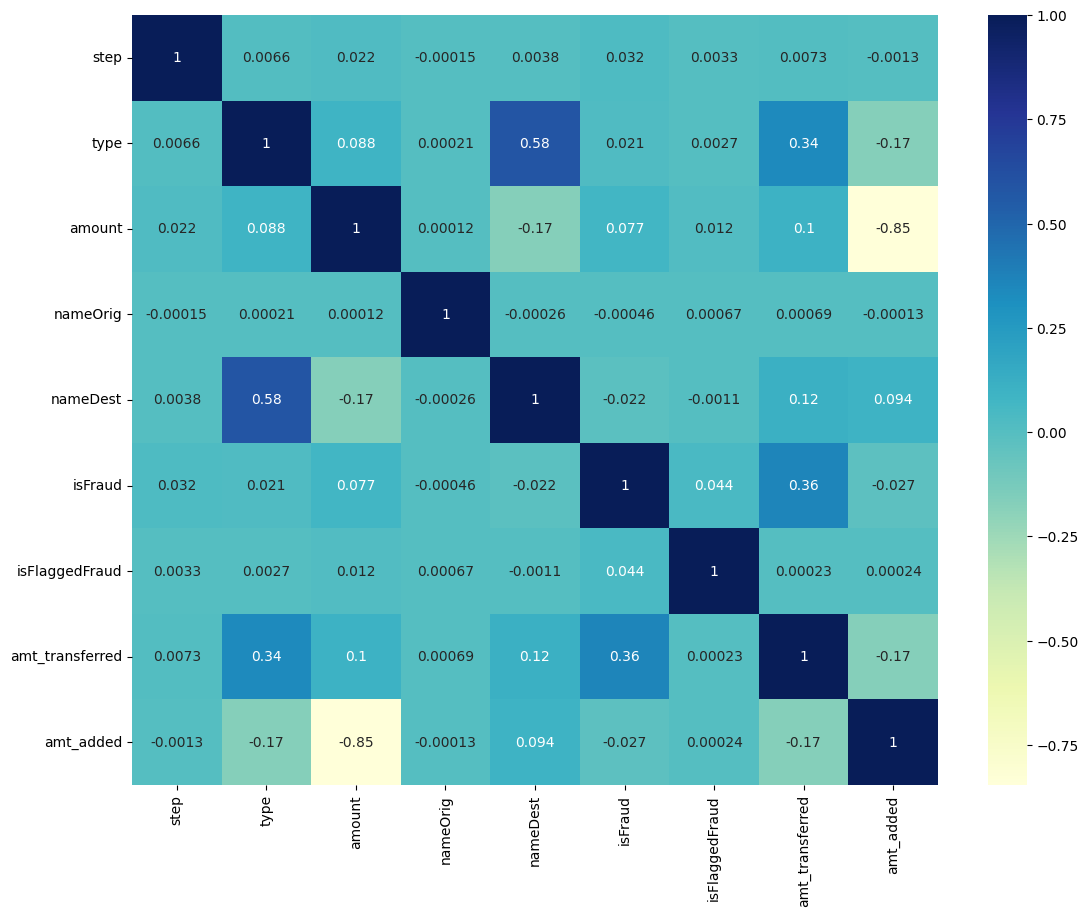

In [ ]:
# checking the correlation between the columns
plt.figure(figsize=(13,10))
sns.heatmap(new_df.corr(), cmap="YlGnBu",annot=True)
plt.show()

"nameOrig" and "nameDest" are not related to "isFrud". So these variables will not help us in building the model. "amt_transferred" and "amt_added" are similar so we can remove "amt_added".

In [ ]:
new_df.drop(["nameOrig","nameDest","amt_added"],axis="columns",inplace=True)

In [ ]:
# Replicating it for our main DataFrame df
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","nameOrig","nameDest","amt_added"],axis="columns",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             object 
 2   amount           float64
 3   isFraud          int64  
 4   isFlaggedFraud   int64  
 5   amt_transferred  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 291.3+ MB


In [ ]:
df = pd.get_dummies(df, columns = ["type"])
df.head()

,step,amount,isFraud,isFlaggedFraud,amt_transferred,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0,0,9839.64,0,0,0,1,0
1,1,1864.28,0,0,1864.28,0,0,0,1,0
2,1,181.00,1,0,181.00,0,0,0,0,1
3,1,181.00,1,0,181.00,0,1,0,0,0
4,1,11668.14,0,0,11668.14,0,0,0,1,0


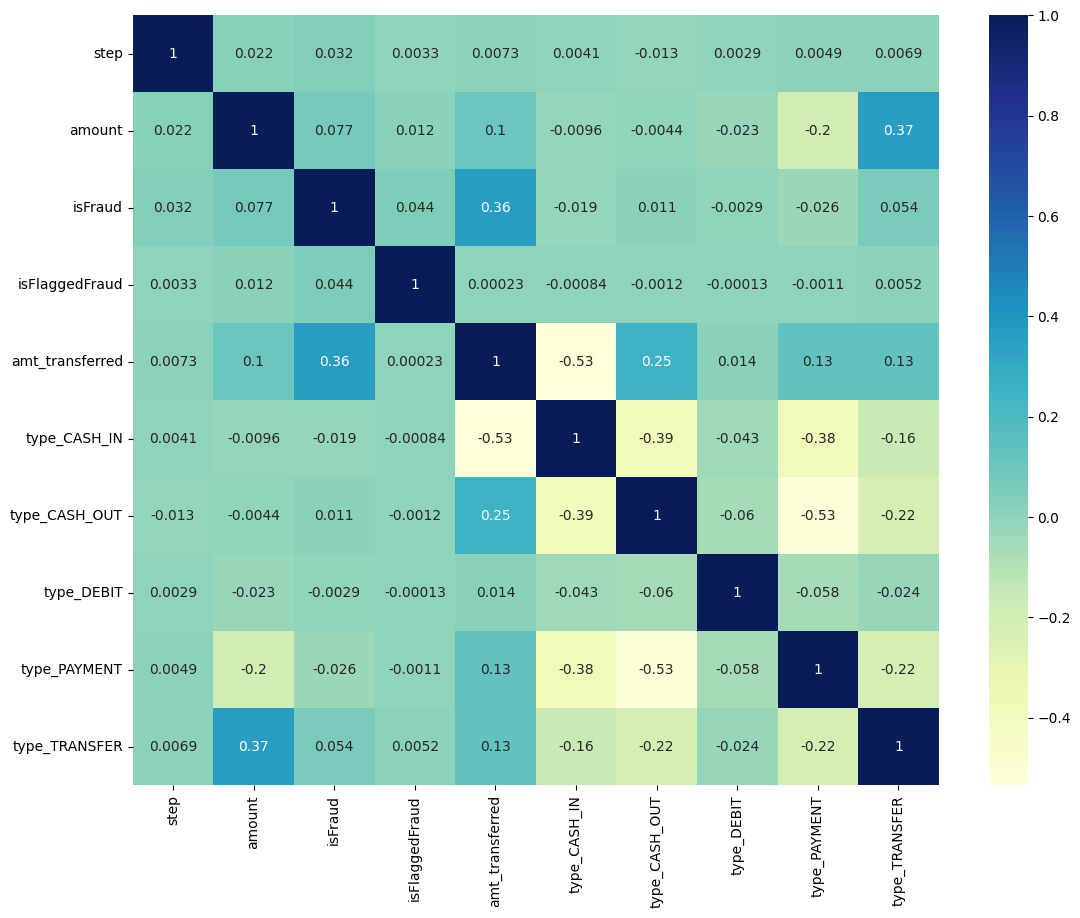

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
X=df.drop(["isFraud"],axis=1)
y=df["isFraud"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   amount           float64
 2   isFlaggedFraud   int64  
 3   amt_transferred  float64
 4   type_CASH_IN     uint8  
 5   type_CASH_OUT    uint8  
 6   type_DEBIT       uint8  
 7   type_PAYMENT     uint8  
 8   type_TRANSFER    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 224.5 MB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: isFraud
Non-Null Count    Dtype
--------------    -----
6362620 non-null  int64
dtypes: int64(1)
memory usage: 48.5 MB


## Scaling and Splitting Data

In [ ]:
#scaling train and test data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = scaler.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.2, random_state= 50)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 9)
Shape of X_test:  (1272524, 9)


## Modelling

### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_score = dt.score(X_test, y_test) * 100
dt_score

99.93202485768441

In [ ]:
# Calculate precision, recall, and F1 score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\nAccuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 score:", f1_dt)

[[1270573     287]
 [    578    1086]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270860
           1       0.79      0.65      0.72      1664

    accuracy                           1.00   1272524
   macro avg       0.90      0.83      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9993202485768441
Precision: 0.7909686817188638
Recall: 0.6526442307692307
F1 score: 0.7151794534079684


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, y_test) * 100
rf_score

99.92094451656708

In [ ]:
# Calculate precision, recall, and F1 score
accuracy_rf = accuracy_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(confusion_matrix(y_test, y_pred_rf))
print('\n',classification_report(y_test, y_pred_rf))

print("\nAccuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 score:", f1_rf)

[[1270838      22]
 [    984     680]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270860
           1       0.97      0.41      0.57      1664

    accuracy                           1.00   1272524
   macro avg       0.98      0.70      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9992094451656708
Precision: 0.9686609686609686
Recall: 0.40865384615384615
F1 score: 0.5748098055790363
